In [33]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
%matplotlib inline

Question 01

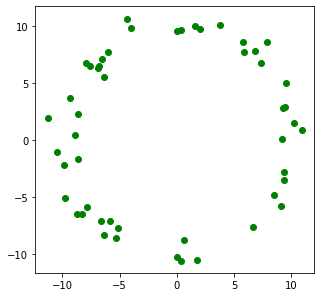

In [34]:
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform(0, 2*np.pi, half_n )

n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t),(r+n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n,1), y.reshape(half_n, 1)))


# m, b = -1, 2
# x = np.linspace(-12, 12, half_n)
# y = m*x + b + s*np.random.randn(half_n)
# X_line = np.hstack((x.reshape(half_n,1) , y.reshape(half_n,1)))

# X = np.vstack((X_circ , X_line))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(x,y,'o',color='green')
ax.set_aspect('equal')

plt.show()


In [35]:
total_points = len(x)
print(total_points)

50


In [36]:
p = 0.99
s = 3
e = 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
print(N)

35


In [37]:
def findCircle(x1, y1, x2, y2, x3, y3) :
	B = (x1**2 + y1**2)*(y2-y3) + (x2**2+y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)
	A = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
	C = (x1**2 + y1**2)*(x2-x3) + (x2**2 + y2**2)*(x3-x1) + (x3**2 + y3**2)*(x1-x2)
	D = (x1**2 + y1**2)*(x3*y2-x2*y3) + (x2**2 + y2**2)*(x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1 - x1*y2)
	
	H = B/(2*A)
	K = -C/(2*A)
	R = np.sqrt((B**2 + C**2 - 4*A*D)/(4*(A**2)))
	L = [H,K,R]


	return L




In [38]:
findCircle(1,1,2,4,5,3)


[3.0, 2.0, 2.23606797749979]

In [39]:
def drawCircle(x0,y0,r,PX,PY):
    theta = np.linspace(0, 2*np.pi,360)
    xx , yy = x0 + r*np.cos(theta) , y0 + r*np.sin(theta)
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot()
    ax.plot(xx,yy,color='green')
    ax.plot(x,y,'o')
    ax.plot(PX,PY,'o',color = 'red')
    

    ax.set_aspect('equal')
    ax.grid('on')
    plt.show()


In [40]:
def random3(n):
    a,b,c = np.random.randint(n,size=3)
    if a==b or b==c or a==c:
        return random3(n)
    else:
        return a,b,c

In [41]:
def pointToCircle(hh,kk,r,x11,y11):
    return (np.abs(np.sqrt((x11-hh)**2+(y11-kk)**2)-r))

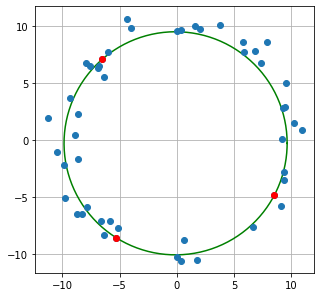

39


In [42]:
ransac = []
max_inliers = 0
inlier_set = []

for i in range(total_points):
    
    point1, point2, point3 = random3(total_points)
    inliers = 0
    
    center_x, center_y, radius = findCircle(x[point1],y[point1],x[point2],y[point2],x[point3],y[point3])
    
    inlier_set = []
    for j in range(total_points):
        d = pointToCircle(center_x,center_y,radius,x[j],y[j])
        if d<1:
            inliers+=1
            inlier_set.append([x[j],y[j]])

    
    outliers = total_points - inliers
    
    if inliers > max_inliers:
        ransac = [point1,point2,point3]
        max_inliers = inliers
        ransac_center_x, ransac_center_y, ransac_radius = center_x, center_y, radius
        ransac_set = inlier_set
        
drawCircle(ransac_center_x,ransac_center_y,ransac_radius,[x[ransac[0]],x[ransac[1]],x[ransac[2]]],[y[ransac[0]],y[ransac[1]],y[ransac[2]]])
print(max_inliers)


In [43]:
print(len(ransac_set))

39


39


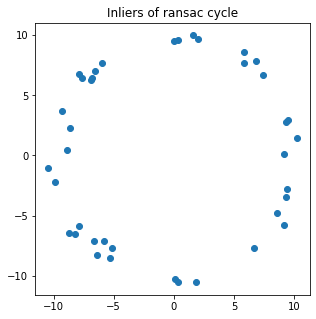

In [44]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ransac_x = []
ransac_y = []
for h in ransac_set:
    ransac_x.append(h[0])
    ransac_y.append(h[1])

ax.plot(ransac_x,ransac_y,'o')
print(len(ransac_x))
ax.set_aspect('equal')
plt.title("Inliers of ransac cycle")
plt.show()


In [45]:
total_points = len(ransac_set)


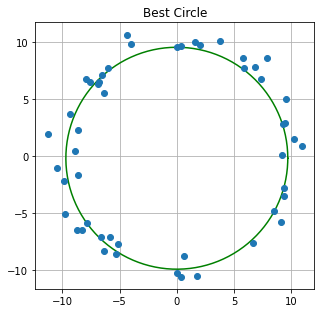

In [46]:
best = []
max_inliers = 0

for i in range(total_points):
    
    point1, point2, point3 = random3(total_points)
    inliers = 0
    
    center_x, center_y, radius = findCircle(ransac_x[point1],ransac_y[point1],ransac_x[point2],ransac_y[point2],ransac_x[point3],ransac_y[point3])
    
    for j in range(total_points):
        d = pointToCircle(center_x,center_y,radius,ransac_x[j],ransac_y[j])
        if d<1:
            inliers+=1

    if inliers > max_inliers:
        best = [point1,point2,point3]
        max_inliers = inliers
        best_center_x, best_center_y, best_radius = center_x, center_y, radius
        

theta = np.linspace(0,2*np.pi,360)
xx , yy = best_center_x + best_radius*np.cos(theta) , best_center_y + best_radius*np.sin(theta)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(xx,yy,color='green')
ax.plot(x,y,'o')

ax.set_aspect('equal')
ax.grid('on')
plt.title("Best Circle")
plt.show()



Question 02

In [47]:
def computeHomography(fromPoints, toPoints):
    x_dash_1, y_dash_1, x_dash_2, y_dash_2, x_dash_3, y_dash_3, x_dash_4, y_dash_4 = toPoints[0], toPoints[1], toPoints[2], toPoints[3], toPoints[4], toPoints[5], toPoints[6], toPoints[7]
    x1T, x2T, x3T, x4T = fromPoints[0], fromPoints[1], fromPoints[2], fromPoints[3]
    
    #make the matrix A
    a = np.concatenate((zero_matrix.T,x1T, -y_dash_1*x1T), axis=1)
    b = np.concatenate((x1T,zero_matrix.T, -x_dash_1*x1T), axis=1)

    c = np.concatenate((zero_matrix.T,x2T, -y_dash_2*x2T), axis=1)
    d = np.concatenate((x2T,zero_matrix.T, -x_dash_2*x2T), axis=1)

    e = np.concatenate((zero_matrix.T,x3T, -y_dash_3*x3T), axis=1)
    f = np.concatenate((x3T,zero_matrix.T, -x_dash_3*x3T), axis=1)

    g = np.concatenate((zero_matrix.T,x4T, -y_dash_4*x4T), axis=1)
    h = np.concatenate((x4T,zero_matrix.T, -x_dash_4*x4T), axis=1)

    A = np.concatenate((a,b,c,d,e,f,g,h), axis=0, dtype = np.float64)

    A_transpose_times_A = (A.T)@A
    W,V = np.linalg.eig(A_transpose_times_A)
    temph = V[:, np.argmin(W)]
    H = temph.reshape((3,3))
    return H    

In [48]:
#code for get the mouse click points
corners = []
def click_left_button(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x,y])
    

img = cv.imread('001.jpg')
cv.imshow('image', img)
cv.setMouseCallback('image', click_left_button)
cv.waitKey(0)
cv.destroyAllWindows()

In [49]:
height, width = np.shape(img)[0],np.shape(img)[1]
zero_matrix = np.array([[0],[0],[0]])

In [50]:
#points corresponding to mouse clicking
toPoints  = [ corners[0][0], corners[0][1], corners[1][0], corners[1][1], corners[2][0], corners[2][1], corners[3][0], corners[3][1]]
# x_dash_1 = corners[0][0]
# y_dash_1 = corners[0][1]

# x_dash_2 = corners[1][0]
# y_dash_2 = corners[1][1]

# x_dash_3 = corners[2][0]
# y_dash_3 = corners[2][1]

# x_dash_4 = corners[3][0]
# y_dash_4 = corners[3][1]

In [51]:
flag = cv.imread(r'flag.png')
flag_height , flag_width = np.shape(flag)[0] , np.shape(flag)[1]
#corner positions of the flag
fromPoints = [np.array([[0,0,1]]), np.array([[flag_width-1, 0,1]]), np.array([[flag_width-1, flag_height-1, 1]]), np.array([[0,flag_height-1,1]])]

In [52]:
# #make the matrix A
# a = np.concatenate((zero_matrix.T,x1T, -y_dash_1*x1T), axis=1)
# b = np.concatenate((x1T,zero_matrix.T, -x_dash_1*x1T), axis=1)

# c = np.concatenate((zero_matrix.T,x2T, -y_dash_2*x2T), axis=1)
# d = np.concatenate((x2T,zero_matrix.T, -x_dash_2*x2T), axis=1)

# e = np.concatenate((zero_matrix.T,x3T, -y_dash_3*x3T), axis=1)
# f = np.concatenate((x3T,zero_matrix.T, -x_dash_3*x3T), axis=1)

# g = np.concatenate((zero_matrix.T,x4T, -y_dash_4*x4T), axis=1)
# h = np.concatenate((x4T,zero_matrix.T, -x_dash_4*x4T), axis=1)

# A = np.concatenate((a,b,c,d,e,f,g,h), axis=0, dtype = np.float64)

In [53]:
# A_transpose_times_A = (A.T)@A
# W,V = np.linalg.eig(A_transpose_times_A)
# temph = V[:, np.argmin(W)]
# H = temph.reshape((3,3))

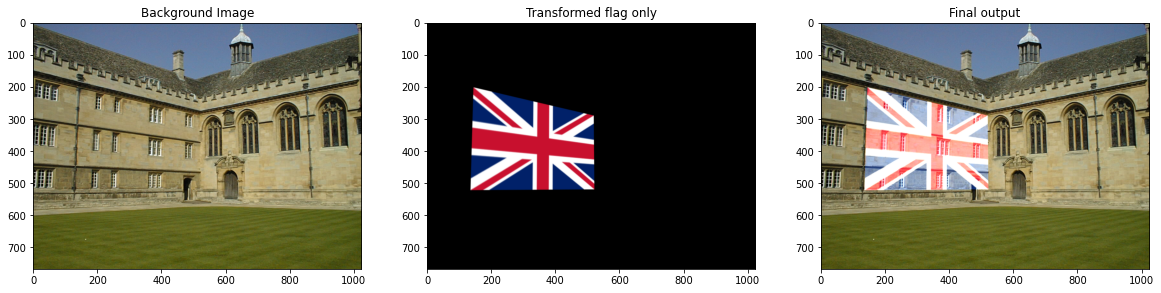

In [54]:
flag_transformed = cv.warpPerspective(flag, computeHomography(fromPoints, toPoints),(width,height))
output = cv.add(flag_transformed,img)

fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) ; ax[0].set_title("Background Image")
ax[1].imshow(cv.cvtColor(flag_transformed, cv.COLOR_BGR2RGB)) ; ax[1].set_title("Transformed flag only")
ax[2].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Final output")
plt.show()

Question 3

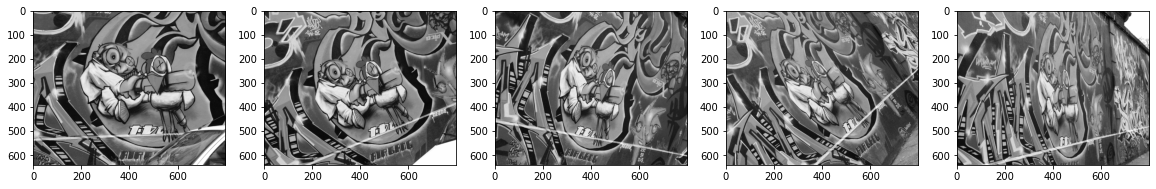

In [55]:
img1 = cv.imread('graf/img1.ppm')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

img2 = cv.imread('graf/img2.ppm')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

img3 = cv.imread('graf/img3.ppm')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

img4 = cv.imread('graf/img4.ppm')
img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

img5 = cv.imread('graf/img5.ppm')
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1,5, figsize= (20,20))
ax[0].imshow(img1, cmap = 'gray')
ax[1].imshow(img2, cmap = 'gray')
ax[2].imshow(img3, cmap = 'gray')
ax[3].imshow(img4, cmap = 'gray')
ax[4].imshow(img5, cmap = 'gray')
plt.show()


(1341, 2)
(1341, 2)
(355.09185791015625, 15.144149780273438)
(260.16571044921875, 95.62032318115234)


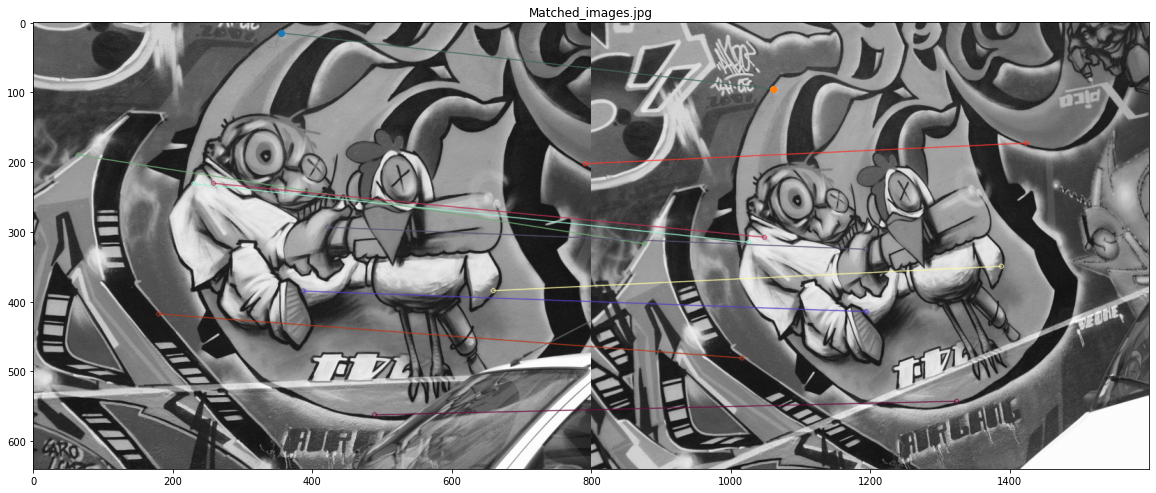

In [56]:
sift = cv.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

list_kp1 = []
list_kp2 = []

list_kp1 = [keypoints_1[mat.queryIdx].pt for mat in matches] 
list_kp2 = [keypoints_2[mat.trainIdx].pt for mat in matches]

print(np.shape(list_kp1))
print(np.shape(list_kp2))
print(list_kp1[0])
print(list_kp2[0])

Matched = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:10], img2, flags=2)

fig, ax = plt.subplots(1,1, figsize = (20,20))
ax.imshow(Matched)
ax.plot(355.09185791015625,15.144149780273438,'o')
ax.plot(260.16571044921875 + np.shape(img1)[1],95.62032318115234,'o')

ax.set_title("Matched_images.jpg")
plt.show()

In [57]:
np.shape(img1)

(640, 800)